In [90]:
# https://www.youtube.com/watch?v=LsK-xG1cLYA
# https://i.stack.imgur.com/CTpi9.png
from sklearn import tree
import pandas as pd
import numpy as np
import math
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [4]:
df = pd.read_csv("./dataset(3)/adaboost_train.csv")
df_test = pd.read_csv("./dataset(3)/adaboost_test.csv")

X_train = df.loc[:,'x1':'x10']
Y_train = df[['y']]

x_test = df_test.loc[:,'x1':'x10']
y_test = df_test[['y']]

print(x_test.shape)
print(X_train.size)



(2400, 10)
96000


In [5]:
def adaBoost(X_train,Y_train, clf,iterations,x_test):
    classifiers = []
    classifiers_test = []
    
    # initializing the weights:
    N = len(Y_train)
    w_i = [1 / N] * N
    T = iterations
    clf_errors = []

    for t in range(T):  
        clf.fit(X_train, Y_train, sample_weight = w_i)
        
        print(math.floor((t/T)*100),"%"," ", end='')
        
        #Predict all the values:
        y_pred = clf.predict(X_train)   
        y_pred_test = clf.predict(x_test)
        error_internal = calc_error(w_i,Y_train,y_pred)
        alpha = np.log((1-error_internal)/ error_internal)
        
        # Add the predictions and alpha for later use for every iteration
        classifiers.append((y_pred, alpha))
        classifiers_test.append((y_pred_test,alpha))
        w_i = update_weights(w_i,y_pred,Y_train,alpha,clf)
        
    # Output the final prediction:
    G, prev_preds = output(classifiers, X_train)
    G_test, prev_preds_test = output(classifiers_test, x_test)
    return G, prev_preds, G_test, prev_preds_test

def output(clfs, X_train):
    res_pred_it = []
    s = np.zeros(len(X_train))
    i = 0
    for (y_pred, alpha) in clfs:
        s += alpha*y_pred
        res_pred_it.append(np.sign(s))
        i+=1
    return np.sign(s), res_pred_it

def calc_error(weights,Y_train,y_pred):
    err = 0
    for i in range(len(weights)):
        if y_pred[i] != Y_train['y'].iloc[i]:
            err= err + weights[i]
            
    # Normalizing the error:
    err = err/np.sum(weights)
    return err

# If the prediction is true, return 0. If it is not true, return 1.
def check_pred(y_p, y_t):
    if y_p == y_t:
        return 0
    else:
        return 1
    
def update_weights(w,y_pred,Y_train,alpha,clf):
    for j in range(len(w)):
        if y_pred[j] != Y_train['y'].iloc[j]:
            w[j] = w[j]* (np.exp( alpha * 1))
    return w
          
def calculate_error_clf(y_pred, y):
    sum_error = 0
    y_pred = np.array(y_pred)
    y= (np.array(y['y'])) 
    sum_error = len(y) - np.count_nonzero(y_pred==y)
    sum_error = sum_error/y.size

    return sum_error

In [125]:
def find_iteration_errors(it, X,Y_train,y_test,x_test):
    weak_clf = tree.DecisionTreeClassifier(max_depth = 1)
    errors = np.zeros(it)
    errors_test = np.zeros(it)
    final_pred, prev_preds, final_pred_test, prev_preds_test = adaBoost(X_train, Y_train,weak_clf,it,x_test)
    i=0
    
    # Get the x and y values for plotting the error for the training:
    for j in range(len(prev_preds)):
    # for pred in prev_preds:
        errors_test[i] = calculate_error_clf(prev_preds_test[j],y_test)
        errors[i] = calculate_error_clf(prev_preds[j], Y_train)
        i+=1
    print("Completed", end='')
    x_vals = list(range(1,it+1))
    
    # plt.show()
    return x_vals,errors,errors_test
        
x_vals, error_res, errors_test = find_iteration_errors(500,X_train,Y_train,y_test, x_test)




0 %  0 %  0 %  0 %  0 %  1 %  1 %  1 %  1 %  1 %  2 %  2 %  2 %  2 %  2 %  3 %  3 %  3 %  3 %  3 %  4 %  4 %  4 %  4 %  4 %  5 %  5 %  5 %  5 %  5 %  6 %  6 %  6 %  6 %  6 %  7 %  7 %  7 %  7 %  7 %  8 %  8 %  8 %  8 %  8 %  9 %  9 %  9 %  9 %  9 %  10 %  10 %  10 %  10 %  10 %  11 %  11 %  11 %  11 %  11 %  12 %  12 %  12 %  12 %  12 %  13 %  13 %  13 %  13 %  13 %  14 %  14 %  14 %  14 %  14 %  15 %  15 %  15 %  15 %  15 %  16 %  16 %  16 %  16 %  16 %  17 %  17 %  17 %  17 %  17 %  18 %  18 %  18 %  18 %  18 %  19 %  19 %  19 %  19 %  19 %  20 %  20 %  20 %  20 %  20 %  21 %  21 %  21 %  21 %  21 %  22 %  22 %  22 %  22 %  22 %  23 %  23 %  23 %  23 %  23 %  24 %  24 %  24 %  24 %  24 %  25 %  25 %  25 %  25 %  25 %  26 %  26 %  26 %  26 %  26 %  27 %  27 %  27 %  27 %  27 %  28 %  28 %  28 %  28 %  28 %  28 %  29 %  29 %  29 %  29 %  30 %  30 %  30 %  30 %  30 %  31 %  31 %  31 %  31 %  31 %  32 %  32 %  32 %  32 %  32 %  33 %  33 %  33 %  33 %  33 %  34 %  34 %  34 %  34 %  34 %  

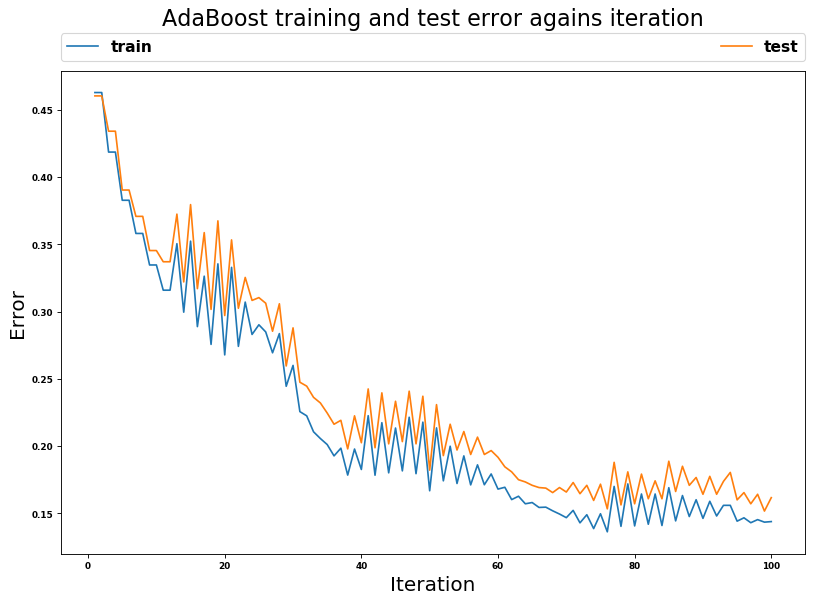

In [124]:

def plot_data(x,y1,y2):
    fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

    plt.title("AdaBoost training and test error agains iteration", y=1.08)

    plt.plot(x,y1, label="train")
    plt.plot(x,y2, label="test") 
    plt.legend(bbox_to_anchor = (0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    params = {
        'legend.fontsize': 14,
        'legend.handlelength': 2}
    plt.rcParams.update(params)

    plt.show()
    
plot_data(x_vals, error_res, errors_test)
